In [74]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [75]:
ticker = input("Enter the stock ticker to be analyzed: ")
length = input("Choose a time period by entering a number, a space, and " + 
               "then a letter [d-day, w-week, m-month, y-year]. For example, to choose 5 days, type '5 d': ")

timeline = 0
if length[2] == 'd':
    timeline = int(length[0])
elif length[2] == 'w':
    timeline = int(length[0]) * 7
elif length[2] == 'm':
    timeline = int(length[0]) * 30
elif length[2] == 'y':
    timeline = int(length[0]) * 365
else:
    quit()

print("The number of days is: " + str(timeline))

Enter the stock ticker to be analyzed: AAPL
Choose a time period by entering a number, a space, and then a letter [d-day, w-week, m-month, y-year]. For example, to choose 5 days, type '5 d': 5 y
The number of days is: 1825


In [76]:
today = date.today()
date5da = today - datetime.timedelta(5)

start_date = str(today - datetime.timedelta(timeline))
end_date = str(today)

print("start date: " + start_date)
print("end date: " + end_date)

start date: 2017-05-18
end date: 2022-05-17


In [77]:
panel_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-18,38.334999,37.782501,37.817501,38.134998,134272800.0,36.101124
2017-05-19,38.494999,38.157501,38.345001,38.264999,107843200.0,36.224182
2017-05-22,38.645000,38.227501,38.500000,38.497501,91865600.0,36.444283
2017-05-23,38.724998,38.327499,38.724998,38.450001,79675600.0,36.399315
2017-05-24,38.542500,38.167500,38.459999,38.334999,76712000.0,36.290447
...,...,...,...,...,...,...
2022-05-11,155.449997,145.809998,153.500000,146.500000,142689800.0,146.500000
2022-05-12,146.199997,138.800003,142.770004,142.559998,182602000.0,142.559998
2022-05-13,148.100006,143.110001,144.589996,147.110001,113787000.0,147.110001


In [78]:
close = panel_data['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

close

2017-05-18     38.134998
2017-05-19     38.264999
2017-05-22     38.497501
2017-05-23     38.450001
2017-05-24     38.334999
                 ...    
2022-05-11    146.500000
2022-05-12    142.559998
2022-05-13    147.110001
2022-05-16    145.539993
2022-05-17    149.240005
Freq: B, Name: Close, Length: 1304, dtype: float64

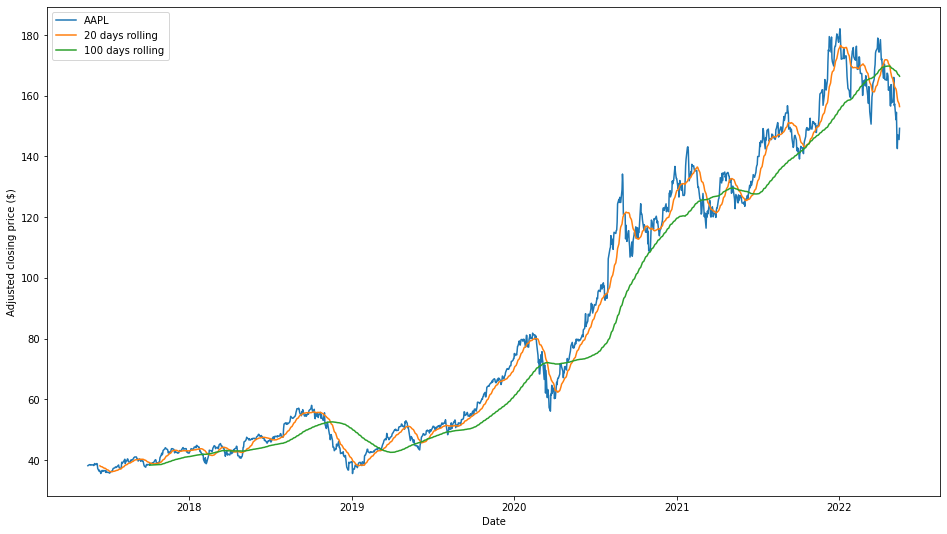

In [79]:
#Using Simple Moving Average
short_rolling_msft = close.rolling(window=20).mean()
long_rolling_msft = close.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker.upper())
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

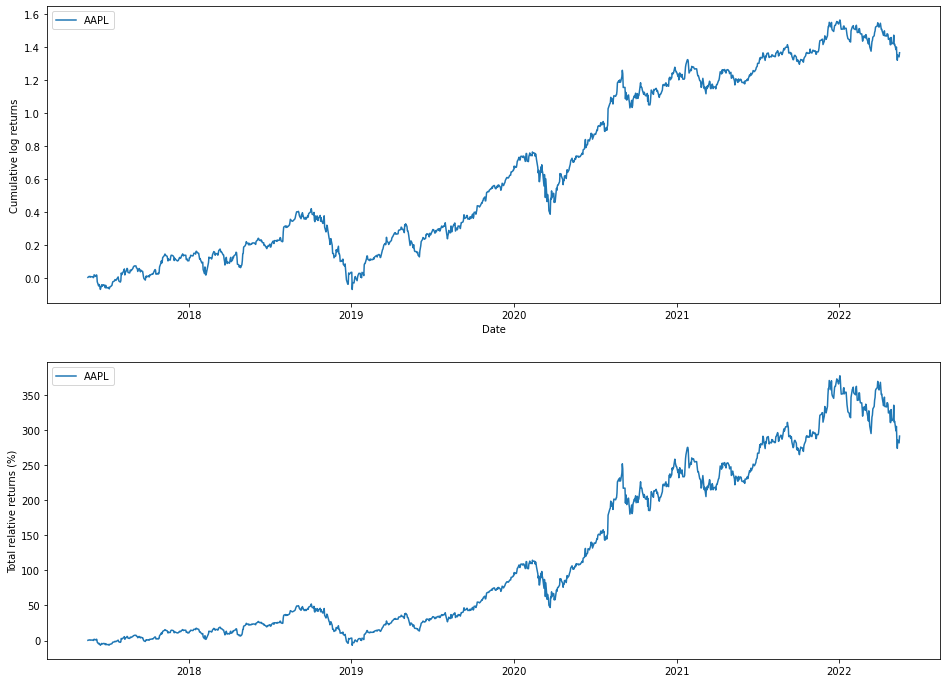

In [101]:
values = close

log_returns = np.log(values).diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax1.plot(log_returns.index, log_returns.cumsum(), label=ticker)
    
ax1.set_ylabel('Cumulative log returns')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

ax2.plot(log_returns.index, 100*(np.exp(log_returns.cumsum()) - 1), label=ticker)
    
ax2.set_ylabel('Total relative returns (%)')
ax1.set_xlabel('Date')
ax2.legend(loc='best')

plt.show()

In [109]:
days = data.shape[0]
years = days / 365

final_returns = 100*(np.exp(log_returns.cumsum()) - 1)[-1]

print('Return from start date to end date is: ' + '{:.2f}'.format(total_returns) + '%')

final_returns_per_year = final_returns / years

print('Average yearly return: ' + '{:.2f}'.format(final_returns_per_year) + '%')

Return from start date to end date is: 291.35%
Average yearly return: 81.55%


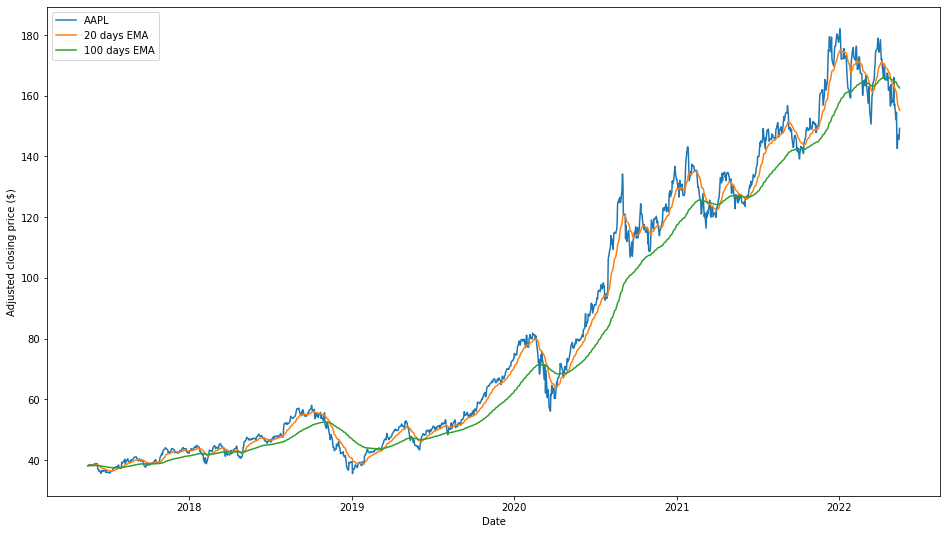

In [112]:
#Using exponential moving average

fig, ax = plt.subplots(figsize=(16,9))

ema_short = close.ewm(span = 20, adjust=False).mean()
ema_long = close.ewm(span = 100, adjust=False).mean()

ax.plot(close.index, close, label=ticker.upper())
ax.plot(ema_short.index, ema_short, label="20 days EMA")
ax.plot(ema_long.index, ema_long, label="100 days EMA")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

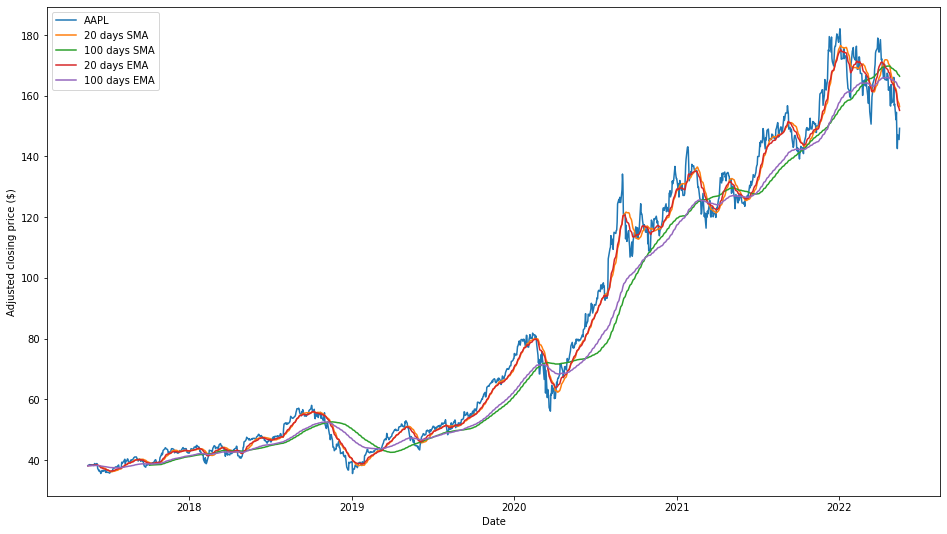

In [113]:
#Exponential vs Simple moving average
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker.upper())
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days SMA')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days SMA')
ax.plot(ema_short.index, ema_short, label="20 days EMA")
ax.plot(ema_long.index, ema_long, label="100 days EMA")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()